In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from __future__ import print_function
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing

%matplotlib inline
%config InlineBackend.figure_format = 'png'
pd.set_option("max_columns",50)

In [3]:
%%time
df = pd.read_csv("../data/train_2013.csv", index_col=0)

Wall time: 39 s


In [4]:
df["date_time"] = pd.to_datetime(df["date_time"], errors="coerce")

In [6]:
# %%time
# skip_col = ["date_time","orig_destination_distance"]
# for col in df_1.columns:
#     if col == skip_col:
#         pass
#     print(col, np.unique(df_1[col].astype(str)))

In [35]:
# check in / check out / distance  => nan값 존재

In [9]:
%%time
df = df.reset_index(drop=True)
# 10000명의 데이터만 사용
df = df.ix[:9999]

Wall time: 1.87 s


In [11]:
df.to_csv("train_2013_10000.csv")

In [36]:
df.columns

Index([u'date_time', u'site_name', u'posa_continent', u'user_location_country',
       u'user_location_region', u'user_location_city',
       u'orig_destination_distance', u'user_id', u'is_mobile', u'is_package',
       u'channel', u'srch_ci', u'srch_co', u'srch_adults_cnt',
       u'srch_children_cnt', u'srch_rm_cnt', u'srch_destination_id',
       u'srch_destination_type_id', u'is_booking', u'cnt', u'hotel_continent',
       u'hotel_country', u'hotel_market', u'hotel_cluster'],
      dtype='object')

In [37]:
cols = df.columns.tolist()[-6:] + df.columns.tolist()[:-6]
df = df[cols]

In [46]:
cols = df.columns.tolist()[:1] + df.columns.tolist()[6:] + df.columns.tolist()[1:6] 
df = df[cols]

In [48]:
# 제거할 feature 생각해보기

In [53]:
df.head()

,is_booking,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,0,2013-06-15 15:10:49,30,4,195,548,56440,NaN,1048,0,1,9,2013-09-07,2013-09-15,2,0,1,1385,1,1,0,185,185,58
1,1,2013-06-15 15:38:05,30,4,195,548,56440,NaN,1048,0,1,9,2013-09-06,2013-09-14,2,0,1,1385,1,1,0,185,185,58
2,0,2013-02-15 13:18:43,2,3,66,462,41898,2716.6746,1482,0,0,1,2013-02-24,2013-03-01,2,0,1,8857,1,1,2,50,214,28
3,0,2013-02-16 11:57:50,2,3,66,462,41898,2716.5257,1482,0,0,0,2013-02-24,2013-03-01,2,0,1,8857,1,1,2,50,214,73
4,0,2013-02-16 12:03:45,2,3,66,462,41898,2722.4856,1482,0,0,0,2013-02-24,2013-03-01,2,0,1,8857,1,1,2,50,214,26


In [49]:
df.columns
#

Index([u'is_booking', u'date_time', u'site_name', u'posa_continent',
       u'user_location_country', u'user_location_region',
       u'user_location_city', u'orig_destination_distance', u'user_id',
       u'is_mobile', u'is_package', u'channel', u'srch_ci', u'srch_co',
       u'srch_adults_cnt', u'srch_children_cnt', u'srch_rm_cnt',
       u'srch_destination_id', u'srch_destination_type_id', u'cnt',
       u'hotel_continent', u'hotel_country', u'hotel_market',
       u'hotel_cluster'],
      dtype='object')

In [68]:
delete_list = ["user_location_city", "user_location_region","is_mobile","is_package","hotel_country","hotel_market"]

In [70]:
df = df.drop(delete_list, axis=1)

In [75]:
print(df.columns, len(df.columns))

Index([u'is_booking', u'date_time', u'site_name', u'posa_continent',
       u'user_location_country', u'orig_destination_distance', u'user_id',
       u'channel', u'srch_ci', u'srch_co', u'srch_adults_cnt',
       u'srch_children_cnt', u'srch_rm_cnt', u'srch_destination_id',
       u'srch_destination_type_id', u'cnt', u'hotel_continent',
       u'hotel_cluster'],
      dtype='object') 18


In [84]:
df = df.drop(["posa_continent","orig_destination_distance", "srch_destination_type_id"], axis=1)

In [83]:
for col in df.columns:
    if col == "date_time":
        continue
    print(df[col].value_counts())
# df["posa_continent"].value_counts()

0    8973
1    1027
Name: is_booking, dtype: int64
2     6498
37    1609
11     495
34     429
24     293
13     190
17     132
8       60
9       53
32      46
25      42
22      42
40      34
33      25
30      17
35      10
28       8
26       7
18       4
10       3
19       3
Name: site_name, dtype: int64
3    7459
1    2038
2     416
4      77
0      10
Name: posa_continent, dtype: int64
66     5960
69     1429
205     860
3       237
46      227
133     184
68      116
225      93
80       72
77       63
70       62
32       53
28       46
62       45
215      44
23       39
231      38
0        37
235      35
154      34
239      33
198      31
85       23
93       22
195      19
29       19
158      18
194      17
182      17
142      14
48       13
148      12
168       9
115       7
27        6
12        6
162       6
51        5
103       5
208       5
1         5
39        5
82        5
119       4
54        3
64        3
157       3
202       3
5         2
57        2
190

In [88]:
# 별다른 Feature Engineering을 하지 않고 제거해서 model을 돌려보자

In [100]:
df["srch_ci"] = pd.to_datetime(df["srch_ci"], errors="coerce")
df["srch_co"] = pd.to_datetime(df["srch_co"], errors="coerce")

In [118]:
le = preprocessing.LabelEncoder()

In [121]:
df["srch_ci"] = le.fit_transform(df["srch_ci"])
df["srch_co"] = le.fit_transform(df["srch_co"])

In [134]:
df["date_time"] = df["date_time"].dt.date
df["date_time"] = le.fit_transform(df["date_time"])

In [135]:
trn_x = df.ix[:,1:]
trn_y = df.ix[:,:1]

In [136]:
model = RandomForestClassifier(max_depth=3, n_jobs=-1, random_state=402)

# y 를 잘못 설정해부렸던 case

In [137]:
model.fit(trn_x,trn_y)

C:\Users\Byeon\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=402, verbose=0, warm_start=False)

Feature ranking:
1. feature 11 cnt (0.533188)
2. feature 6 srch_co (0.102094)
3. feature 7 srch_adults_cnt (0.091235)
4. feature 12 hotel_continent (0.050153)
5. feature 3 user_id (0.042140)
6. feature 4 channel (0.039411)
7. feature 8 srch_children_cnt (0.036964)
8. feature 10 srch_destination_id (0.032244)
9. feature 5 srch_ci (0.030716)
10. feature 9 srch_rm_cnt (0.021721)
11. feature 1 site_name (0.009355)
12. feature 13 hotel_cluster (0.007323)
13. feature 0 date_time (0.003447)
14. feature 2 user_location_country (0.000008)


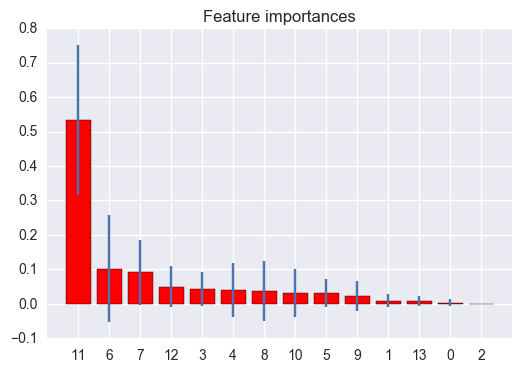

In [153]:
importances = model.feature_importances_

std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(trn_x.shape[1]):
#     print(indices[f])
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], trn_x.columns[indices[f]], importances[indices[f]]))

plt.title("Feature importances")
plt.bar(range(trn_x.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(trn_x.shape[1]), indices)
plt.xlim([-1, trn_x.shape[1]])
plt.show()

In [ ]:
# 1. feature 11 cnt (0.533188)
# 2. feature 6 srch_co (0.102094)
# 3. feature 7 srch_adults_cnt (0.091235)
# 4. feature 12 hotel_continent (0.050153)
# 5. feature 3 user_id (0.042140)
# 6. feature 4 channel (0.039411)
# 7. feature 8 srch_children_cnt (0.036964)
# 8. feature 10 srch_destination_id (0.032244)
# 9. feature 5 srch_ci (0.030716)
# 10. feature 9 srch_rm_cnt (0.021721)
# 11. feature 1 site_name (0.009355)
# 12. feature 13 hotel_cluster (0.007323)
# 13. feature 0 date_time (0.003447)
# 14. feature 2 user_location_country (0.000008) => 제거

In [154]:
sub_ex = pd.read_csv("../sample_submission.csv")

In [164]:
sub_ex.head()

,id,hotel_cluster
0,0,99 1
1,1,99 1
2,2,99 1
3,3,99 1
4,4,99 1


In [158]:
trn_x.head()

,date_time,site_name,user_location_country,user_id,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,cnt,hotel_continent,hotel_cluster
0,159,30,195,1048,9,239,245,2,0,1,1385,1,0,58
1,159,30,195,1048,9,238,244,2,0,1,1385,1,0,58
2,39,2,66,1482,1,44,47,2,0,1,8857,1,2,28
3,40,2,66,1482,0,44,47,2,0,1,8857,1,2,73
4,40,2,66,1482,0,44,47,2,0,1,8857,1,2,26


In [ ]:
# is_booking이 y라고 생각했는데 다시 생각해보니 hotel_cluster가 중요함

C:\Users\Byeon\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Feature ranking:
1. feature 13 hotel_continent (0.364650)
2. feature 11 srch_destination_id (0.172174)
3. feature 2 site_name (0.159535)
4. feature 3 user_location_country (0.102945)
5. feature 4 user_id (0.077250)
6. feature 7 srch_co (0.027816)
7. feature 6 srch_ci (0.019617)
8. feature 10 srch_rm_cnt (0.017608)
9. feature 9 srch_children_cnt (0.017537)
10. feature 1 date_time (0.014128)
11. feature 8 srch_adults_cnt (0.011914)
12. feature 5 channel (0.010902)
13. feature 12 cnt (0.003925)
14. feature 0 is_booking (0.000000)


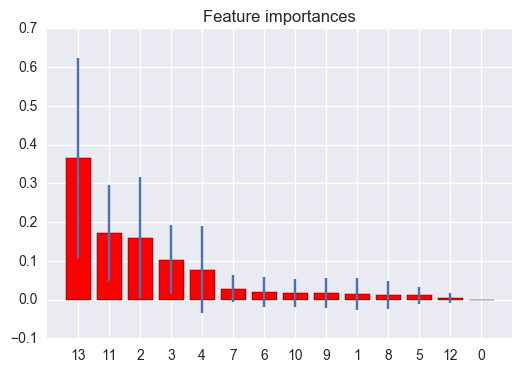

In [163]:
trn_x1 = df.ix[:,:-1]
trn_y1 = df.ix[:,-1:]

model.fit(trn_x1,trn_y1)

importances = model.feature_importances_

std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(trn_x1.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], trn_x1.columns[indices[f]], importances[indices[f]]))

plt.title("Feature importances")
plt.bar(range(trn_x1.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(trn_x1.shape[1]), indices)
plt.xlim([-1, trn_x1.shape[1]])
plt.show()
# 위로 10000개 잡고, 샘플링, 다시 나오나 보고 변한다면, 데이터가 흔들리는지 확인
# feature 샘플링.  

In [ ]:
# Feature ranking:
# 1. feature 13 hotel_continent (0.364650) 
# 2. feature 11 srch_destination_id (0.172174)
# 3. feature 2 site_name (0.159535)
# 4. feature 3 user_location_country (0.102945)
# 5. feature 4 user_id (0.077250)
# 6. feature 7 srch_co (0.027816)
# 7. feature 6 srch_ci (0.019617)
# 8. feature 10 srch_rm_cnt (0.017608)
# 9. feature 9 srch_children_cnt (0.017537)
# 10. feature 1 date_time (0.014128)
# 11. feature 8 srch_adults_cnt (0.011914)
# 12. feature 5 channel (0.010902)
# 13. feature 12 cnt (0.003925)
# 14. feature 0 is_booking (0.000000)


# co-ci 기간 변수 
# is_booking한 사람의

# Feature engineering

In [179]:
df.head()

,is_booking,date_time,site_name,user_location_country,user_id,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,cnt,hotel_continent,hotel_cluster
0,0,159,30,195,1048,9,239,245,2,0,1,1385,1,0,58
1,1,159,30,195,1048,9,238,244,2,0,1,1385,1,0,58
2,0,39,2,66,1482,1,44,47,2,0,1,8857,1,2,28
3,0,40,2,66,1482,0,44,47,2,0,1,8857,1,2,73
4,0,40,2,66,1482,0,44,47,2,0,1,8857,1,2,26
